In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from numpy import nan
data = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values=['nan','?'])
data.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


We combined the date and time column so that it can be treated as an index

In [3]:
data.shape

(2075259, 7)

In [4]:
# To calculate the metering excluding sub_metering_1, sub_metering_2 and sub_metering_3
values = data.values.astype('float64')

# The remaining enerygy consumption other than the 3 sub metering can be calculated by 
# sub_metering = (global_active_power * 1000 / 60) - (sub_metering_1 + sub_metering_2 + sub_metering_3)
# Thus datetime col in treated as index and global active power is the 0th col
data['Sub_metering_4'] = (values[:,0]*1000/60) - (values[:,4] + values[:,5] + values[:,6])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtypes: float64(8)
memory usage: 142.5 MB


In [6]:
data.to_csv('household_power_consumption.txt')
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [7]:
Main_meter = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_4']
data['Power_Consumption'] = data[Main_meter].sum(axis = 1)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Power_Consumption
datetime,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,70.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333,89.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667,89.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000,89.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000,61.100000


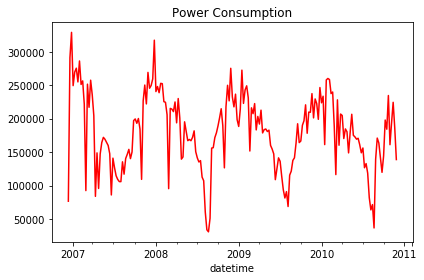

In [26]:
data.Power_Consumption.resample('W').sum().plot(title='Power Consumption', color = 'red') 

plt.tight_layout()
plt.show()   


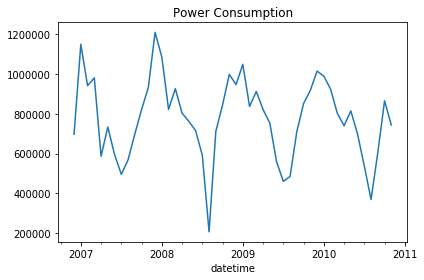

In [16]:
data.Power_Consumption.resample('M').sum().plot(title='Power Consumption') 

plt.tight_layout()
plt.show()   

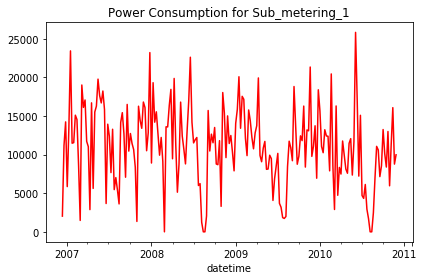

In [27]:
data.Sub_metering_1.resample('W').sum().plot(title='Power Consumption for Sub_metering_1', color = 'red') 

plt.tight_layout()
plt.show()

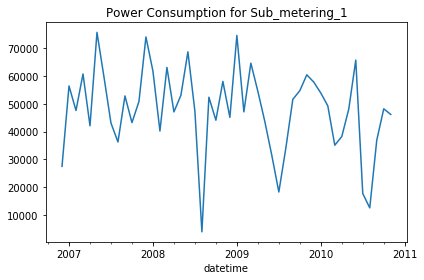

In [19]:
data.Sub_metering_1.resample('M').sum().plot(title='Power Consumption for Sub_metering_1') 

plt.tight_layout()
plt.show()

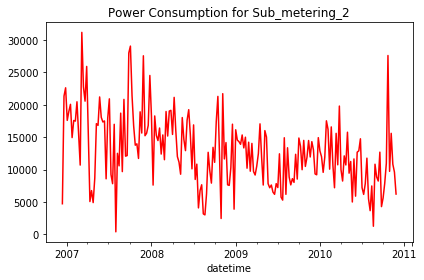

In [28]:
data.Sub_metering_2.resample('W').sum().plot(title='Power Consumption for Sub_metering_2', color = 'red') 

plt.tight_layout()
plt.show()

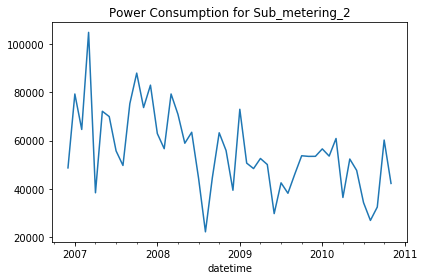

In [21]:
data.Sub_metering_2.resample('M').sum().plot(title='Power Consumption for Sub_metering_2') 

plt.tight_layout()
plt.show()

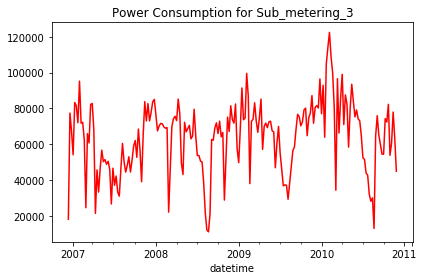

In [29]:
data.Sub_metering_3.resample('W').sum().plot(title='Power Consumption for Sub_metering_3', color = 'red') 

plt.tight_layout()
plt.show()

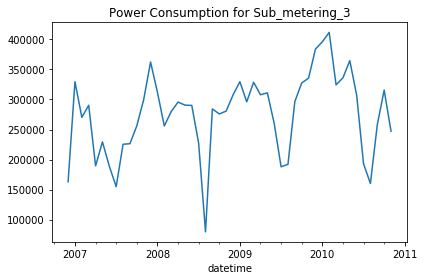

In [23]:
data.Sub_metering_3.resample('M').sum().plot(title='Power Consumption for Sub_metering_3') 

plt.tight_layout()
plt.show()

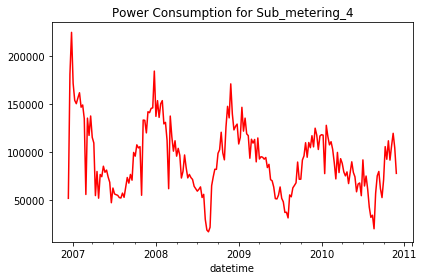

In [30]:
data.Sub_metering_4.resample('W').sum().plot(title='Power Consumption for Sub_metering_4', color = 'red') 

plt.tight_layout()
plt.show()

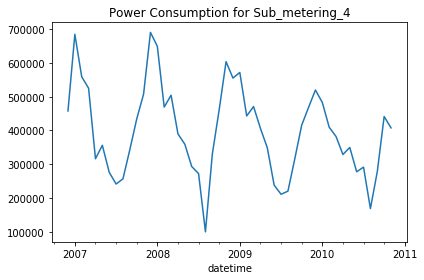

In [25]:
data.Sub_metering_4.resample('M').sum().plot(title='Power Consumption for Sub_metering_4') 

plt.tight_layout()
plt.show()